## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras import optimizers
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=0.0001, drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = Dropout(drp_ratio)(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
L2_EXP = [1e-4, 1e-8]
Dropout_EXP = [0.2, 0.5]
BATCH_SIZE = [128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    for d in Dropout_EXP:
        for b in BATCH_SIZE:
            model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio, drp_ratio=d)
            model.summary()
            optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

            model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=b, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

            exp_tag = "regulizer_ratio %s Dropout_EXP %s BATCH_SIZE %s" % (str(regulizer_ratio), str(d), str(b))
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["accuracy"]
            valid_acc = model.history.history["val_accuracy"]
            results[exp_tag] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-accuracy': train_acc,
                                'valid-accuracy': valid_acc}


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)              

391/391 [==============================] - 14s 37ms/step - loss: 1.5247 - accuracy: 0.4999 - val_loss: 1.5761 - val_accuracy: 0.4796
Epoch 46/50
391/391 [==============================] - 14s 37ms/step - loss: 1.5178 - accuracy: 0.5015 - val_loss: 1.5394 - val_accuracy: 0.4925
Epoch 47/50
391/391 [==============================] - 15s 37ms/step - loss: 1.5087 - accuracy: 0.5066 - val_loss: 1.5139 - val_accuracy: 0.5086
Epoch 48/50
391/391 [==============================] - 14s 37ms/step - loss: 1.5091 - accuracy: 0.5051 - val_loss: 1.5016 - val_accuracy: 0.5102
Epoch 49/50
391/391 [==============================] - 14s 37ms/step - loss: 1.4947 - accuracy: 0.5099 - val_loss: 1.5521 - val_accuracy: 0.4934
Epoch 50/50
391/391 [==============================] - 14s 37ms/step - loss: 1.4960 - accuracy: 0.5094 - val_loss: 1.5146 - val_accuracy: 0.5050
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape             

196/196 [==============================] - 10s 51ms/step - loss: 1.4470 - accuracy: 0.5269 - val_loss: 1.4985 - val_accuracy: 0.5107
Epoch 40/50
196/196 [==============================] - 10s 53ms/step - loss: 1.4429 - accuracy: 0.5293 - val_loss: 1.5103 - val_accuracy: 0.5091
Epoch 41/50
196/196 [==============================] - 10s 51ms/step - loss: 1.4453 - accuracy: 0.5262 - val_loss: 1.5548 - val_accuracy: 0.4933
Epoch 42/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4344 - accuracy: 0.5326 - val_loss: 1.5264 - val_accuracy: 0.5057
Epoch 43/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4210 - accuracy: 0.5352 - val_loss: 1.5122 - val_accuracy: 0.5066
Epoch 44/50
196/196 [==============================] - 10s 51ms/step - loss: 1.4233 - accuracy: 0.5342 - val_loss: 1.5668 - val_accuracy: 0.4908
Epoch 45/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4191 - accuracy: 0.5389 - val_loss: 1.5125 - val_accuracy: 0.50

391/391 [==============================] - 15s 38ms/step - loss: 1.8753 - accuracy: 0.3684 - val_loss: 1.7287 - val_accuracy: 0.4323
Epoch 34/50
391/391 [==============================] - 15s 38ms/step - loss: 1.8690 - accuracy: 0.3700 - val_loss: 1.7222 - val_accuracy: 0.4355
Epoch 35/50
391/391 [==============================] - 15s 38ms/step - loss: 1.8693 - accuracy: 0.3709 - val_loss: 1.7220 - val_accuracy: 0.4301
Epoch 36/50
391/391 [==============================] - 15s 38ms/step - loss: 1.8692 - accuracy: 0.3723 - val_loss: 1.7361 - val_accuracy: 0.4285
Epoch 37/50
391/391 [==============================] - 15s 38ms/step - loss: 1.8685 - accuracy: 0.3690 - val_loss: 1.7231 - val_accuracy: 0.4329
Epoch 38/50
391/391 [==============================] - 15s 39ms/step - loss: 1.8763 - accuracy: 0.3701 - val_loss: 1.7613 - val_accuracy: 0.4262
Epoch 39/50
391/391 [==============================] - 15s 38ms/step - loss: 1.8767 - accuracy: 0.3662 - val_loss: 1.7374 - val_accuracy: 0.42

196/196 [==============================] - 10s 53ms/step - loss: 1.8215 - accuracy: 0.3914 - val_loss: 1.6928 - val_accuracy: 0.4423
Epoch 28/50
196/196 [==============================] - 10s 53ms/step - loss: 1.8153 - accuracy: 0.3956 - val_loss: 1.7087 - val_accuracy: 0.4393
Epoch 29/50
196/196 [==============================] - 10s 53ms/step - loss: 1.8073 - accuracy: 0.3984 - val_loss: 1.7048 - val_accuracy: 0.4341
Epoch 30/50
196/196 [==============================] - 10s 52ms/step - loss: 1.8120 - accuracy: 0.3928 - val_loss: 1.6987 - val_accuracy: 0.4338
Epoch 31/50
196/196 [==============================] - 10s 53ms/step - loss: 1.8022 - accuracy: 0.3955 - val_loss: 1.6762 - val_accuracy: 0.4410
Epoch 32/50
196/196 [==============================] - 10s 53ms/step - loss: 1.7899 - accuracy: 0.4016 - val_loss: 1.7023 - val_accuracy: 0.4408
Epoch 33/50
196/196 [==============================] - 10s 53ms/step - loss: 1.7938 - accuracy: 0.3997 - val_loss: 1.6868 - val_accuracy: 0.44

391/391 [==============================] - 15s 38ms/step - loss: 1.4885 - accuracy: 0.4658 - val_loss: 1.4484 - val_accuracy: 0.4781
Epoch 22/50
391/391 [==============================] - 15s 38ms/step - loss: 1.4761 - accuracy: 0.4708 - val_loss: 1.4338 - val_accuracy: 0.4839
Epoch 23/50
391/391 [==============================] - 15s 38ms/step - loss: 1.4709 - accuracy: 0.4714 - val_loss: 1.4698 - val_accuracy: 0.4710
Epoch 24/50
391/391 [==============================] - 15s 37ms/step - loss: 1.4714 - accuracy: 0.4700 - val_loss: 1.4562 - val_accuracy: 0.4726
Epoch 25/50
391/391 [==============================] - 15s 38ms/step - loss: 1.4694 - accuracy: 0.4719 - val_loss: 1.4469 - val_accuracy: 0.4824
Epoch 26/50
391/391 [==============================] - 15s 38ms/step - loss: 1.4688 - accuracy: 0.4745 - val_loss: 1.4310 - val_accuracy: 0.4870
Epoch 27/50
391/391 [==============================] - 15s 38ms/step - loss: 1.4558 - accuracy: 0.4802 - val_loss: 1.4043 - val_accuracy: 0.49

196/196 [==============================] - 10s 52ms/step - loss: 1.4761 - accuracy: 0.4685 - val_loss: 1.4392 - val_accuracy: 0.4797
Epoch 16/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4628 - accuracy: 0.4768 - val_loss: 1.4438 - val_accuracy: 0.4782
Epoch 17/50
196/196 [==============================] - 10s 51ms/step - loss: 1.4617 - accuracy: 0.4759 - val_loss: 1.4263 - val_accuracy: 0.4903
Epoch 18/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4474 - accuracy: 0.4830 - val_loss: 1.4177 - val_accuracy: 0.4947
Epoch 19/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4372 - accuracy: 0.4846 - val_loss: 1.4055 - val_accuracy: 0.4983
Epoch 20/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4245 - accuracy: 0.4866 - val_loss: 1.4095 - val_accuracy: 0.4987
Epoch 21/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4287 - accuracy: 0.4899 - val_loss: 1.3904 - val_accuracy: 0.50

391/391 [==============================] - 15s 38ms/step - loss: 1.8327 - accuracy: 0.3299 - val_loss: 1.7143 - val_accuracy: 0.3829
Epoch 10/50
391/391 [==============================] - 15s 37ms/step - loss: 1.8216 - accuracy: 0.3343 - val_loss: 1.6885 - val_accuracy: 0.3953
Epoch 11/50
391/391 [==============================] - 15s 38ms/step - loss: 1.8098 - accuracy: 0.3413 - val_loss: 1.7000 - val_accuracy: 0.3863
Epoch 12/50
391/391 [==============================] - 15s 37ms/step - loss: 1.7988 - accuracy: 0.3453 - val_loss: 1.6939 - val_accuracy: 0.3827
Epoch 13/50
391/391 [==============================] - 15s 37ms/step - loss: 1.8021 - accuracy: 0.3449 - val_loss: 1.6843 - val_accuracy: 0.4016
Epoch 14/50
391/391 [==============================] - 15s 38ms/step - loss: 1.7898 - accuracy: 0.3492 - val_loss: 1.6691 - val_accuracy: 0.4041
Epoch 15/50
391/391 [==============================] - 15s 38ms/step - loss: 1.7833 - accuracy: 0.3541 - val_loss: 1.7254 - val_accuracy: 0.38

196/196 [==============================] - 10s 50ms/step - loss: 2.0846 - accuracy: 0.2440 - val_loss: 1.9509 - val_accuracy: 0.2923
Epoch 4/50
196/196 [==============================] - 10s 50ms/step - loss: 1.9971 - accuracy: 0.2666 - val_loss: 1.8783 - val_accuracy: 0.3241
Epoch 5/50
196/196 [==============================] - 10s 50ms/step - loss: 1.9489 - accuracy: 0.2860 - val_loss: 1.8246 - val_accuracy: 0.3404
Epoch 6/50
196/196 [==============================] - 10s 53ms/step - loss: 1.9119 - accuracy: 0.3007 - val_loss: 1.8134 - val_accuracy: 0.3482
Epoch 7/50
196/196 [==============================] - 10s 53ms/step - loss: 1.8784 - accuracy: 0.3163 - val_loss: 1.7767 - val_accuracy: 0.3572
Epoch 8/50
196/196 [==============================] - 10s 53ms/step - loss: 1.8583 - accuracy: 0.3189 - val_loss: 1.7576 - val_accuracy: 0.3675
Epoch 9/50
196/196 [==============================] - 10s 53ms/step - loss: 1.8364 - accuracy: 0.3287 - val_loss: 1.7341 - val_accuracy: 0.3742
Epo

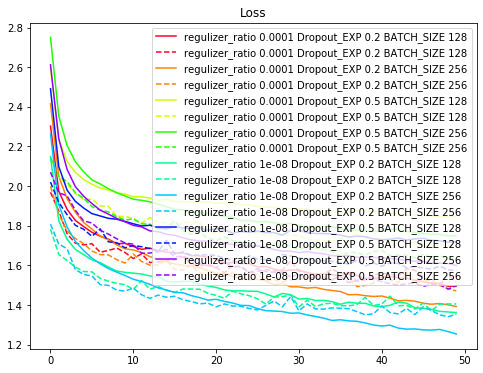

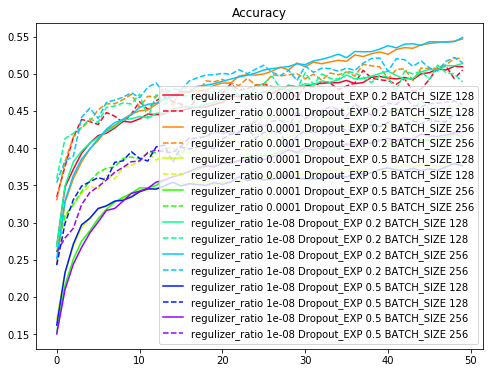

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()